In [1]:
from experiment import Experiment
%matplotlib inline

In [2]:
var_dict = dict(
    categorical_vars = ['Work_accident', 'promotion_last_5years', 'sales', 
                        'salary', 'number_project','time_spend_company'],
    numerical_vars = ['satisfaction_level', 'last_evaluation', 'average_montly_hours'],
    class_var = 'left'
)

In [6]:
exp = Experiment('data/HR_comma_sep.csv', 
                 var_dict,
                 embedding_dim=128,
                 lr=0.00001,
                 batch_size=1024,
                 n_epoch=200,
                 verbose=False,
                 n_bins_range=range(10, 11),
                 n_init_bins_list=[10])

In [7]:
print('#Numerical Vars =', len(var_dict['numerical_vars']))
print('#Categorical Vars =', len(var_dict['categorical_vars']))
print('#Dummy coded categorical cols =', exp.n_dummy_coded_categorical_cols)

#Numerical Vars = 3
#Categorical Vars = 6
#Dummy coded categorical cols = 17


In [8]:
%time clf_scores = exp.test_classification_performance(cv=3)

61
61
trn_sb shape 44
val_sb shape 44
61
61
trn_sb shape 50
val_sb shape 50
61
61
trn_sb shape 48
val_sb shape 48
CPU times: user 2min, sys: 19.6 s, total: 2min 19s
Wall time: 2min 9s


In [9]:
exp.print_classification_scores(clf_scores, method='dummy_only')

DT performance
#cols = 34.0, Accuracy = 0.959 (+/- 0.003)
LR performance
#cols = 34.0, Accuracy = 0.896 (+/- 0.008)


In [10]:
exp.print_classification_scores(clf_scores, method='scale_numeric')

DT performance
#cols = 34.0, Accuracy = 0.959 (+/- 0.003)
LR performance
#cols = 34.0, Accuracy = 0.896 (+/- 0.008)


In [11]:
exp.print_classification_scores(clf_scores, method='equal_width')

DT performance
#Bins = 10, #Avg Cols = 61.0, Accuracy = 0.929 (+/- 0.006)
LR performance
#Bins = 10, #Avg Cols = 61.0, Accuracy = 0.942 (+/- 0.001)
NB performance
#Bins = 10, #Avg Cols = 61.0, Accuracy = 0.920 (+/- 0.005)


In [12]:
exp.print_classification_scores(clf_scores, method='equal_freq')

DT performance
#Bins = 10, #Avg Cols = 61.0, Accuracy = 0.931 (+/- 0.007)
LR performance
#Bins = 10, #Avg Cols = 61.0, Accuracy = 0.937 (+/- 0.006)
NB performance
#Bins = 10, #Avg Cols = 61.0, Accuracy = 0.906 (+/- 0.008)


In [13]:
exp.print_classification_scores(clf_scores, method='semantic_binning')

DT performance
#Init Bins = 10, #Avg Cols = 47.333333333333336, Accuracy = 0.937 (+/- 0.005)
LR performance
#Init Bins = 10, #Avg Cols = 47.333333333333336, Accuracy = 0.918 (+/- 0.012)
NB performance
#Init Bins = 10, #Avg Cols = 47.333333333333336, Accuracy = 0.879 (+/- 0.014)


In [14]:
exp.semantic_binning.bins_by_var

{'average_montly_hours': {'bins': ['(95.999, 150.0]',
   '(150.0, 162.0]',
   '(162.0, 180.0]',
   '(180.0, 220.0]',
   '(220.0, 237.0]',
   '(237.0, 252.0]',
   '(252.0, 267.0]',
   '(267.0, 310.0]'],
  'split_point': [95.999,
   150.0,
   162.0,
   180.0,
   220.0,
   237.0,
   252.0,
   267.0,
   310.0]},
 'last_evaluation': {'bins': ['(0.359, 0.49]',
   '(0.49, 0.59]',
   '(0.59, 0.79]',
   '(0.79, 0.85]',
   '(0.85, 1.0]'],
  'split_point': [0.359, 0.49, 0.59, 0.79, 0.85, 1.0]},
 'satisfaction_level': {'bins': ['(0.089, 0.21]',
   '(0.21, 0.57]',
   '(0.57, 0.85]',
   '(0.85, 1.0]'],
  'split_point': [0.089, 0.21, 0.57, 0.85, 1.0]}}

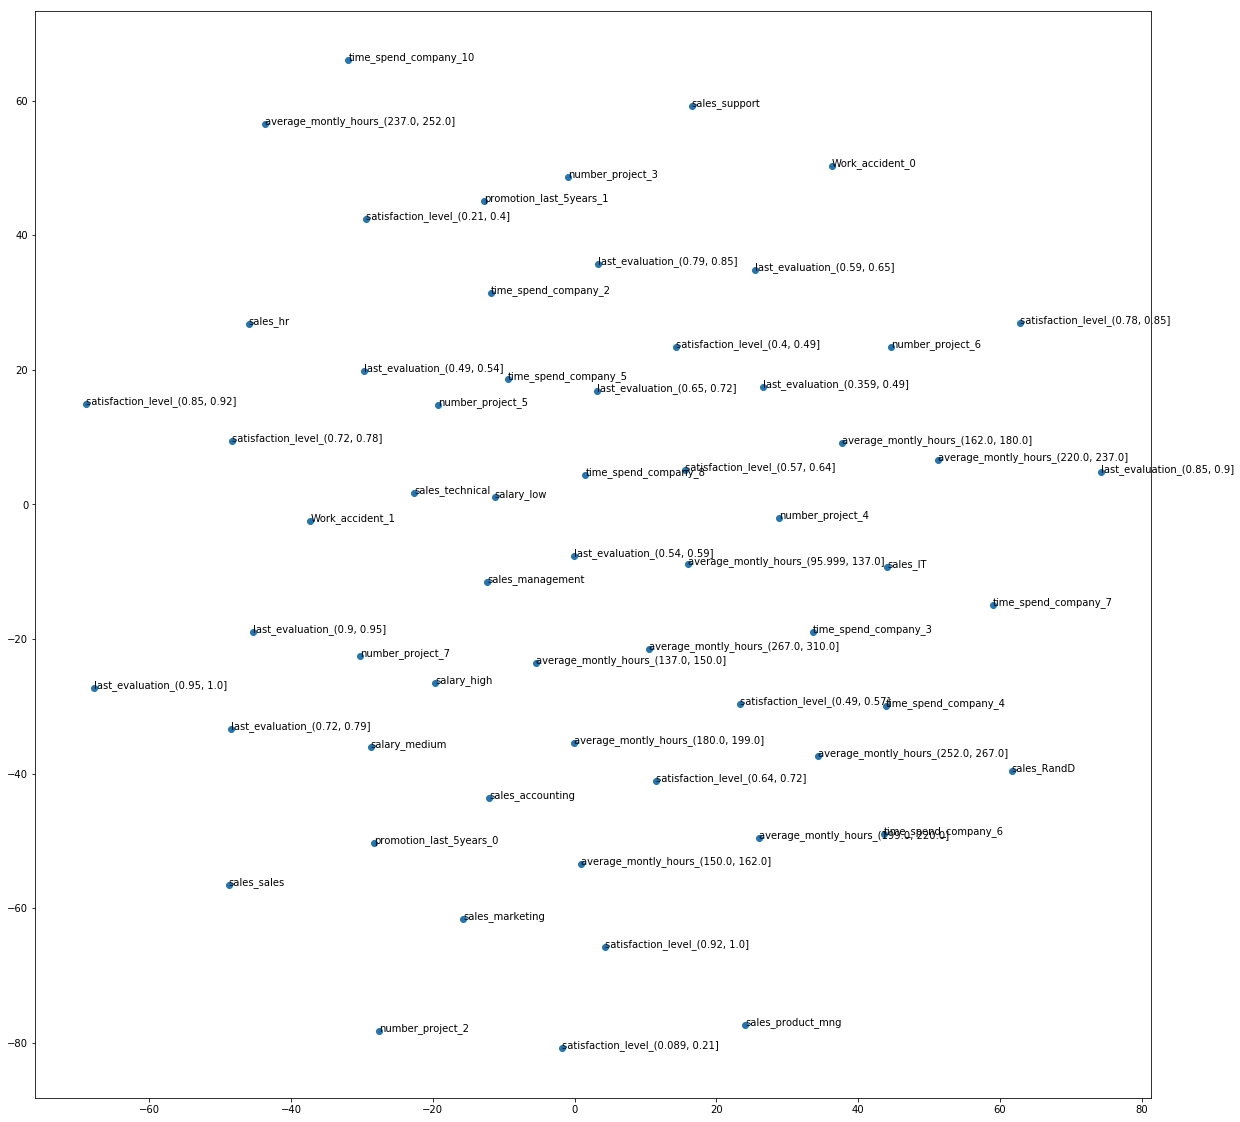

In [15]:
exp.semantic_binning.visualize_bin_embeddings()

### 학습된 트리의 깊이, 형태 비교

In [13]:
# dot_data = StringIO()
# export_graphviz(dt, out_file=dot_data, feature_names=X.columns, 
#                 impurity=False, proportion=True)
# graph = pydot.graph_from_dot_data(dot_data.getvalue())